In [33]:
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

class FiniteEngine:
    
    def __init__(self):
        self.strike = 10
        self.maturity = 10.48770575499286
        self.risk_free_rate = 0.1
        self.volatility = 0.5
        self.stockMax = 1
        self.Ms = 20
        self.Nt = 20
        self.dt = self.stockMax/(float(self.Ms))
        self.dx = self.maturity/(float(self.Nt))
        
        
    def coef_a(self, i):
        return 0.5 * i * i * self.dt * (self.volatility ** 2) + 0.5 * i * self.dt

    def coef_b(self, i):
        return 1 - i * i * self.volatility * self.volatility * self.dt -self.risk_free_rate * self.dt

    def coef_c(self, i):
        return 0.5 * i * i * self.dt * (self.volatility ** 2) - 0.5 * i * self.dt
    
    def plot_option(self,x_values,c_values):
        fig, ax = plt.subplots()
        ax.plot(x_values,c_values)
        ax.set_xlabel('Stock')
        ax.set_ylabel('Option')
        ax.set_title('Finite Model price')
        plt.show()

    def plot_surface(self, output1, output2,output3):
        X = np.reshape(output1, (self.Ms, self.Nt))
        Y = np.reshape(output2, (self.Ms, self.Nt))
        Z = np.reshape(output3, (self.Ms, self.Nt))
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.YlGnBu_r)
        ax.set_zlim3d(0, 1.0)
        ax.set_xlabel(r'$S$')
        ax.set_ylabel(r'$T-t$')
        ax.set_zlabel(r'$C(S,t)$')
        plt.show()

    
    def compute_explicite(self):
        previous = np.zeros(self.Ms)
        xvalues = np.zeros(self.Ms)
        for x in range(self.Ms):
            xvalues[x] =x*self.dx
            previous[x] = max(xvalues[x]- self.strike,0)
            
        result = np.zeros(self.Ms)
        output1 = list()
        output2 = list()
        output3 = list()
    
        prev_t = 0
        
        for ti in range(self.Nt):
            
            cur_t = prev_t + self.dt
            result[0] = 0
            result[self.Ms - 1] = (xvalues[self.Ms - 1] - self.strike) *np.exp(-self.risk_free_rate * self.dt * (self.maturity - prev_t))
            
            for xi in range(1, self.Ms - 1, 1):
                result[xi] = self.coef_a(xi) * previous[xi + 1] + self.coef_b(xi) *previous[xi] + self.coef_c(xi) * previous[xi - 1]
            
            for xi in range(self.Ms):
                output1.append(xvalues[xi])
                output2.append(prev_t)
                output3.append(result[xi])
                previous = result
                prev_t = cur_t
                
        self.plot_option(xvalues,result)
        self.plot_surface(output1,output2,output3)



                

In [34]:
 f =FiniteEngine()

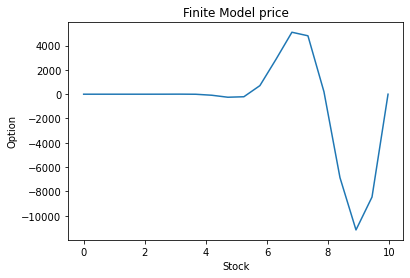

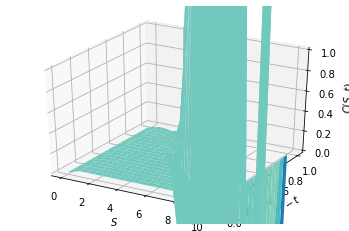

In [35]:
f.compute_explicite()

In [19]:
def create_sphere(cx,cy,cz, r, resolution=360):
    '''
    create sphere with center (cx, cy, cz) and radius r
    '''
    phi = np.linspace(0, 2*np.pi, 2*resolution)
    theta = np.linspace(0, np.pi, resolution)

    theta, phi = np.meshgrid(theta, phi)

    r_xy = r*np.sin(theta)
    x = cx + np.cos(phi) * r_xy
    y = cy + np.sin(phi) * r_xy
    z = cz + r * np.cos(theta)
    
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x,y,z)
    plt.show()

In [20]:
create_sphere(0,0,0,1)

AttributeError: module 'matplotlib.pyplot' has no attribute 'plot_surface'